# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

# 2. Collect and load data

In [44]:
df=pd.read_csv('bigcity.csv')
df.head(5)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 3. Explore numeric variables - five number summary

In [45]:
df_num=df.select_dtypes(include=np.number)
df_num.describe()

,Unnamed: 0,u,x
count,49.00000,49.000000,49.000000
mean,25.00000,103.142857,127.795918
std,14.28869,104.405061,123.121211
min,1.00000,2.000000,46.000000
25%,13.00000,43.000000,58.000000
50%,25.00000,64.000000,79.000000
75%,37.00000,120.000000,130.000000
max,49.00000,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

In [46]:
#3a
df.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

<AxesSubplot:ylabel='Frequency'>

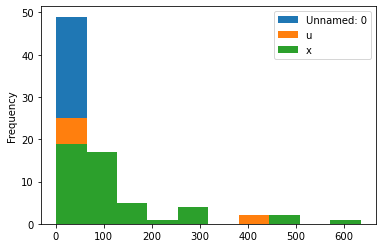

In [47]:
df_num.plot(kind='hist')


<AxesSubplot:xlabel='u'>

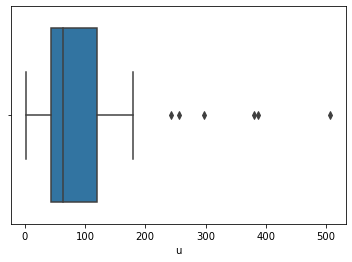

In [48]:
sb.boxplot(x=df['u'])

<AxesSubplot:xlabel='u'>

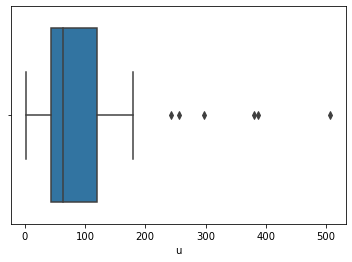

In [49]:
sb.boxplot(x=df['u'])

In [50]:
#3b)
df_num.var()

Unnamed: 0      204.166667
u             10900.416667
x             15158.832483
dtype: float64

In [51]:
df_num.std()

Unnamed: 0     14.288690
u             104.405061
x             123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

<AxesSubplot:xlabel='u', ylabel='x'>

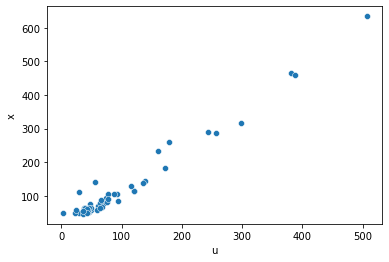

In [52]:
sb.scatterplot(x=df['u'],y=df['x'])

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [57]:
df.index

RangeIndex(start=0, stop=49, step=1)

In [33]:
x = df[['u']]
y = df[['x']]

In [60]:
x.shape,y.shape

((49,), (49,))

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [34]:
df.isnull().sum()  #INFERENCE:there is null values in the dataset

Unnamed: 0    0
u             0
x             0
dtype: int64

In [35]:
df.corr()  

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [36]:
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(x, y,test_size=0.2,random_state=1)

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [62]:
X = sm.add_constant(train_x)
y = train_y
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           2.58e-29
Time:                        17:16:19   Log-Likelihood:                -177.94
No. Observations:                  39   AIC:                             359.9
Df Residuals:                      37   BIC:                             363.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7185      5.231      1.858      0.071      -0.881      20.318
u              1.1595      0.035     33.573      0.000       1.089       1.229
==============================================================================
Omnibus:                       12.712   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.946
Skew:                           1.171   Prob(JB):                      0.00154
Kurtosis:                       4.577   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

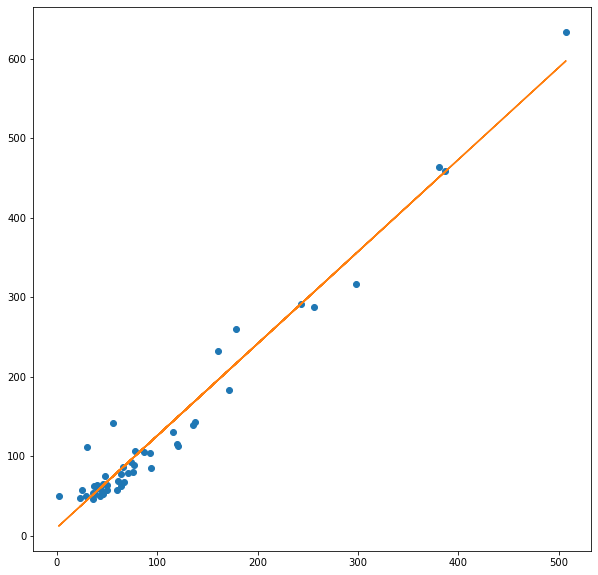

In [38]:
x = df['u']

y = df['x']

plt.figure(figsize=(10,10))
plt.plot(x, y, 'o')


m, b = 1.1595, 9.7185

plt.plot(x, m*x + b)

plt.show()




# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [66]:
train_x=sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
test_y_pred = model.predict(test_x)
train_y_pred=model.predict(train_x)
testing_residuals = test_y - test_y_pred           #INFERENCE:since the two rmse are same ,the model is significant.
training_residuals=train_y-train_y_pred
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error(test_y,test_y_pred,squared=False)
rmse2=mean_squared_error(train_y,train_y_pred,squared=False)
print(rmse1,rmse2)

23.38523519024912 23.18943724391406


In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y,test_y_pred)
r_2=r2_score(train_y,train_y_pred)
print(r2,r_2)

0.9181922560396981 0.9682175540860046


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [41]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(train_x,train_y)
model1.score(train_x,train_y)

0.9682175540860046

In [42]:
model2 = LinearRegression().fit(test_x,test_y)
model2.score(test_x,test_y)

0.9267537067044469